In [1]:

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa




In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Dee@1997",
  database="netflix"
)


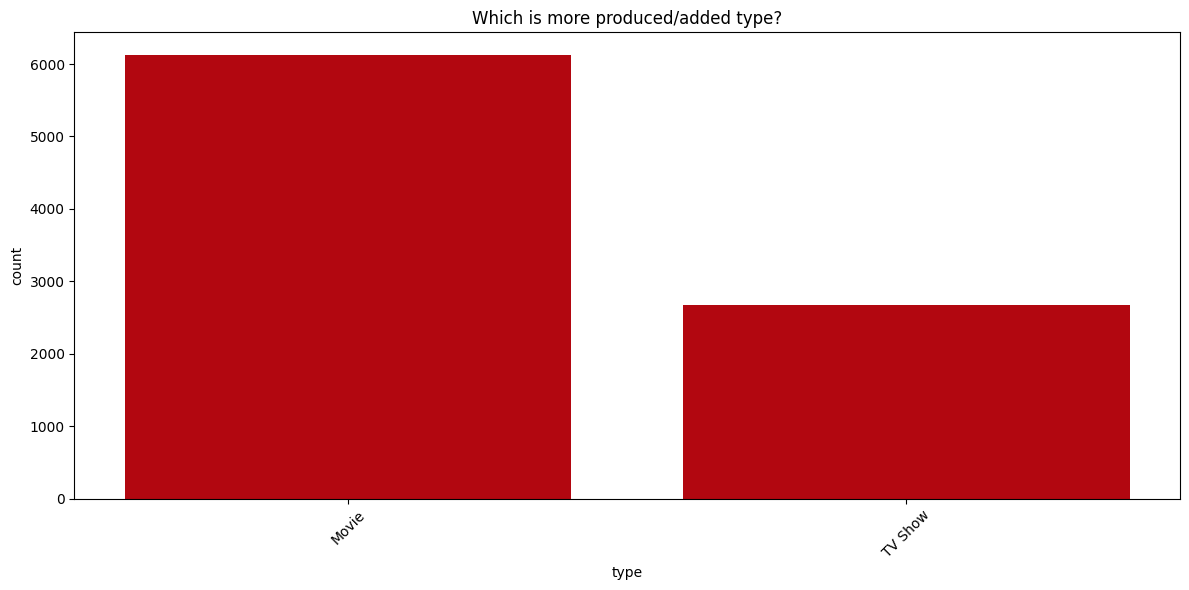

In [12]:
sql_query = """select type,count(*) as cnt  from netflix group by type;"""

cursor = mydb.cursor()
cursor.execute(sql_query)

# Fetch the results
results = cursor.fetchall()

# Separate the type and count data
type = [result[0] for result in results]
counts = [result[1] for result in results]

# Close the cursor and database connection
cursor.close()


# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(type, counts, color='#b20710')
plt.xlabel('type')
plt.ylabel('count')
plt.title('Which is more produced/added type?')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

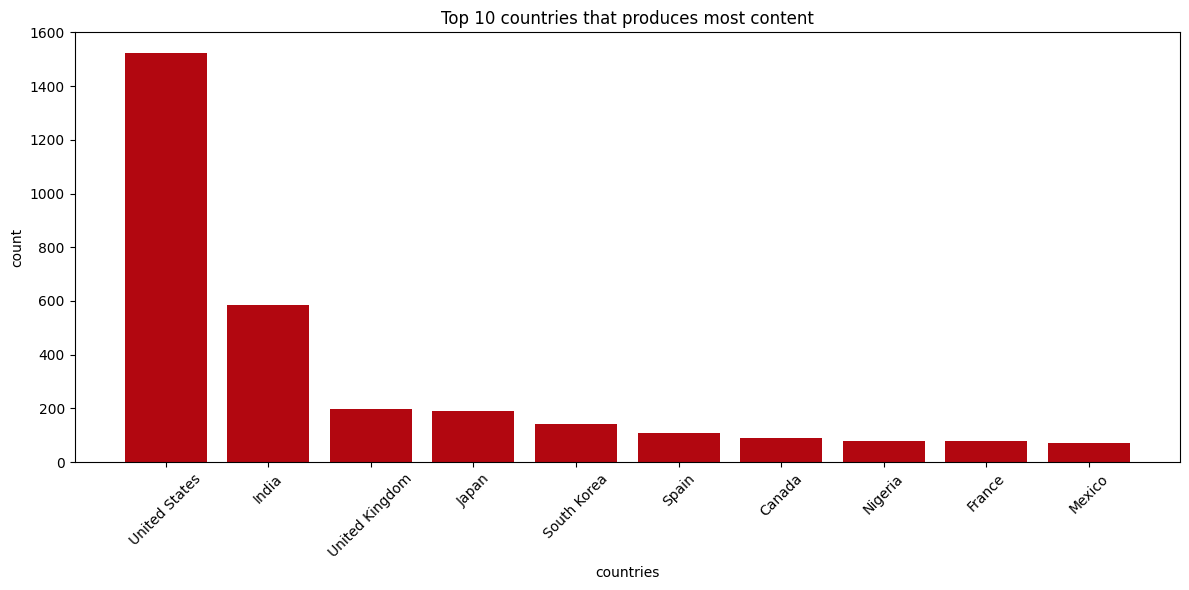

In [3]:

sql_query2 = """SELECT country, COUNT(*) as count FROM netflix inner join imdb using(title) where country is NOT NULL 
GROUP BY country order by count desc limit 10;"""

cursor = mydb.cursor()
cursor.execute(sql_query2)

# Fetch the results
results = cursor.fetchall()

# Separate the type and count data
country = [result[0] for result in results]
counts = [result[1] for result in results]

# Close the cursor and database connection
cursor.close()


# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(country, counts, color='#b20710')
plt.xlabel('countries')
plt.ylabel('count')
plt.title('Top 10 countries that produces most content')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

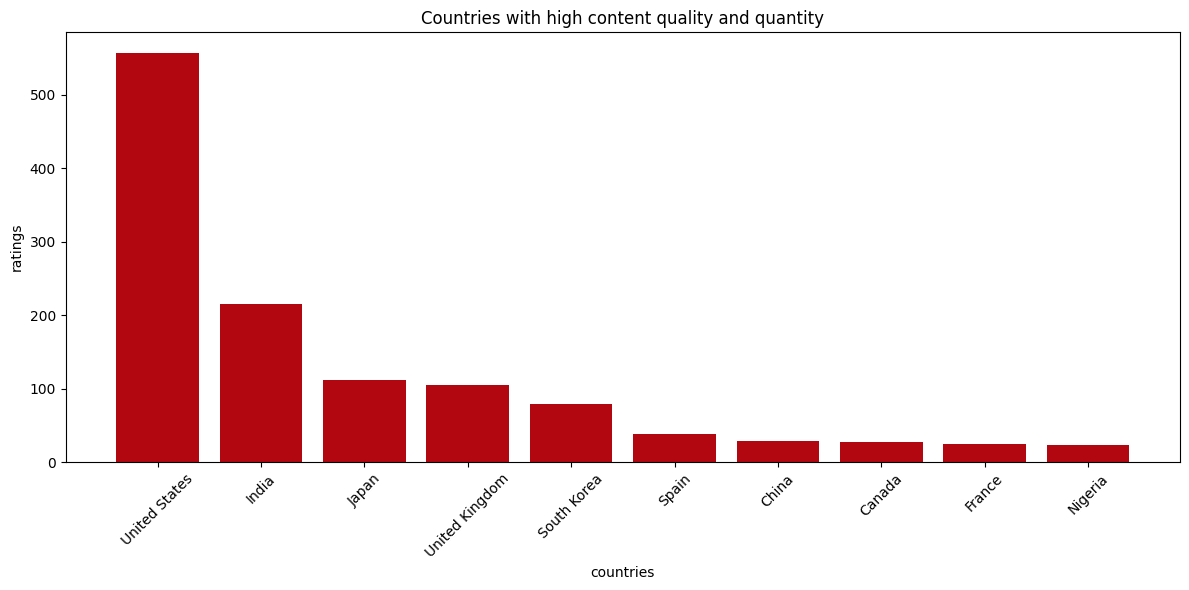

In [7]:
sql_query3 = """with cte as(select country,imdb.rating from netflix inner join imdb on 
imdb.title=netflix.title where country is not null and country not like '%,%' and imdb.rating>(select round(avg(rating)) from imdb))
select country,count(*) as counting from cte group by country order by counting desc limit 10; """

cursor = mydb.cursor()
cursor.execute(sql_query3)

# Fetch the results
results = cursor.fetchall()

# Separate the type and count data
country = [result[0] for result in results]
ratings = [result[1] for result in results]

# Close the cursor and database connection
cursor.close()
#mydb.close()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(country, ratings, color='#b20710')
plt.xlabel('countries')
plt.ylabel('ratings')
plt.title('Countries with high content quality and quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

4
4
        tag percentage
0      Teen      30.09
1     Adult      46.43
2  Children      20.34
3   General       3.15


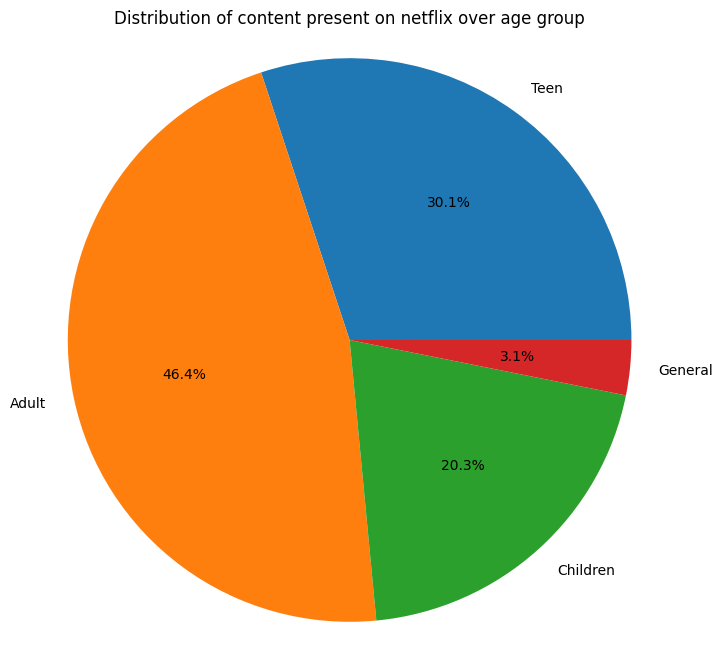

In [9]:

sql_query4 = """
with c as(with cte as(select rating,case
when rating regexp '^[a-z]' and rating in('NC-17','NR','R','TV-MA') then "Adult"
when rating regexp '^[a-z]' and rating in("PG-13",'TV-14') then "Teen"
when rating regexp '^[a-z]' and rating in('TV-Y','PG','TV-Y7','TV-PG') then "Children"
else "General"
end as tag from netflix order by tag)
select tag, count(*)  as cnt from cte group by tag)
select tag,round(cnt/total*100,2) as percentage from c, (select sum(cnt) as total from c) as total_sum;
"""
cursor = mydb.cursor()
cursor.execute(sql_query4)

# Fetch the results
results = cursor.fetchall()
cursor.close()
# Separate the type and count data
df = pd.DataFrame(results, columns=['tag', 'percentage'])

print(len(df['tag']))  # Number of labels
print(len(df['percentage']))  # Number of values
print(df)




#mydb.close()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['percentage'], labels=df['tag'], autopct='%1.1f%%')
plt.title('Distribution of content present on netflix over age group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



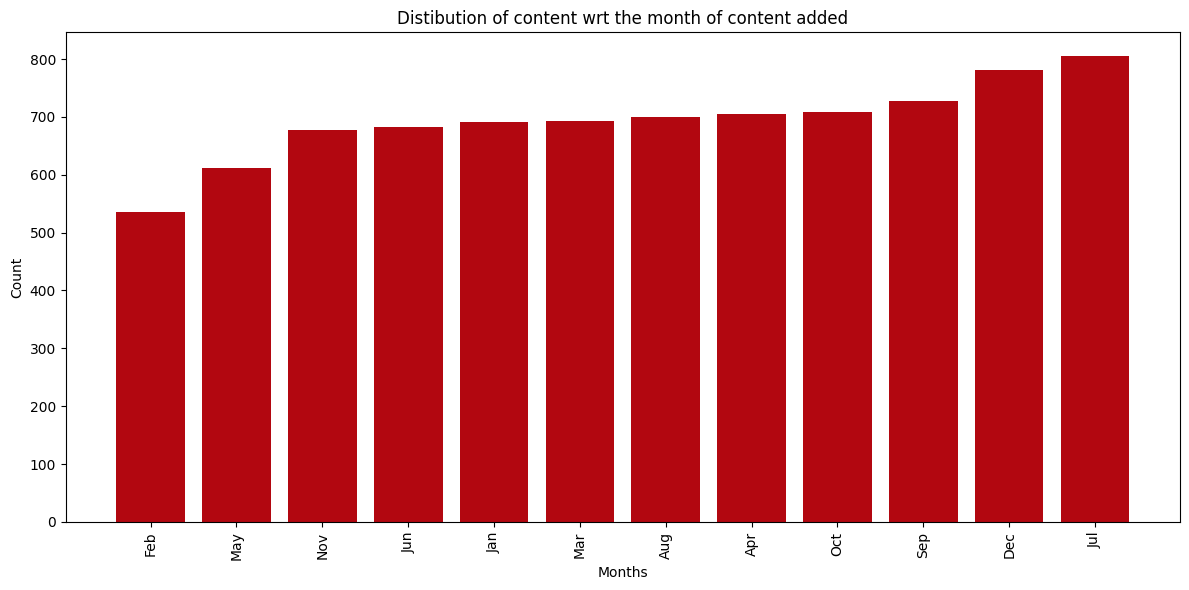

In [3]:
sql_query5 = """SELECT DATE_FORMAT(date_added2, '%b') as x,
       COUNT(DISTINCT show_id) AS production
FROM netflix
where date_added2 is not null 
GROUP BY x
ORDER BY production;"""

cursor = mydb.cursor()
cursor.execute(sql_query5)

# Fetch the results
results = cursor.fetchall()

# Separate the type and count data
month = [result[0] for result in results]
count = [result[1] for result in results]

# Close the cursor and database connection
cursor.close()
#mydb.close()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(month, count, color='#b20710')
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Distibution of content wrt the month of content added')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
